**IMPORTING LIBRARIES**

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

**READING THE DATA**

In [83]:
miles=pd.read_csv('miles-driven.csv',delimiter='|')
print(miles)


                   state  million_miles_annually
0                Alabama                   64914
1                 Alaska                    4593
2                Arizona                   59575
3               Arkansas                   32953
4             California                  320784
5               Colorado                   46606
6            Connecticut                   31197
7               Delaware                    9028
8   District of Columbia                    3568
9                Florida                  191855
10               Georgia                  108454
11                Hawaii                   10066
12                 Idaho                   15937
13              Illinois                  103234
14               Indiana                   76485
15                  Iowa                   31274
16                Kansas                   30021
17              Kentucky                   48061
18             Louisiana                   46513
19                 M

In [84]:
accidents=pd.read_csv('road-accidents.csv',header=9, delimiter ='|')
print(accidents)


                   state  drvr_fatl_col_bmiles  perc_fatl_speed  \
0                Alabama                  18.8               39   
1                 Alaska                  18.1               41   
2                Arizona                  18.6               35   
3               Arkansas                  22.4               18   
4             California                  12.0               35   
5               Colorado                  13.6               37   
6            Connecticut                  10.8               46   
7               Delaware                  16.2               38   
8   District of Columbia                   5.9               34   
9                Florida                  17.9               21   
10               Georgia                  15.6               19   
11                Hawaii                  17.5               54   
12                 Idaho                  15.3               36   
13              Illinois                  12.8               3

**TEXTUAL SUMMARY!**

In [85]:
miles.head()

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


In [86]:
accidents.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


In [87]:
miles.shape

(51, 2)

In [88]:
accidents.shape

(51, 5)

In [89]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   drvr_fatl_col_bmiles  51 non-null     float64
 2   perc_fatl_speed       51 non-null     int64  
 3   perc_fatl_alcohol     51 non-null     int64  
 4   perc_fatl_1st_time    51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [90]:
miles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   state                   51 non-null     object
 1   million_miles_annually  51 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 944.0+ bytes


In [91]:

miles.describe()

,million_miles_annually
count,51.000000
mean,57851.019608
std,59898.414088
min,3568.000000
25%,17450.000000
50%,46606.000000
75%,71922.500000
max,320784.000000


In [92]:

accidents.describe()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
count,51.000000,51.000000,51.000000,51.00000
mean,15.790196,31.725490,30.686275,88.72549
std,4.122002,9.633438,5.132213,6.96011
min,5.900000,13.000000,16.000000,76.00000
25%,12.750000,23.000000,28.000000,83.50000
50%,15.600000,34.000000,30.000000,88.00000
75%,18.500000,38.000000,33.000000,95.00000
max,23.900000,54.000000,44.000000,100.00000


In [93]:
miles.isnull().sum()

state                     0
million_miles_annually    0
dtype: int64

In [94]:
accidents.isnull().sum()

state                   0
drvr_fatl_col_bmiles    0
perc_fatl_speed         0
perc_fatl_alcohol       0
perc_fatl_1st_time      0
dtype: int64

**GRAPHICAL SUMMARY**

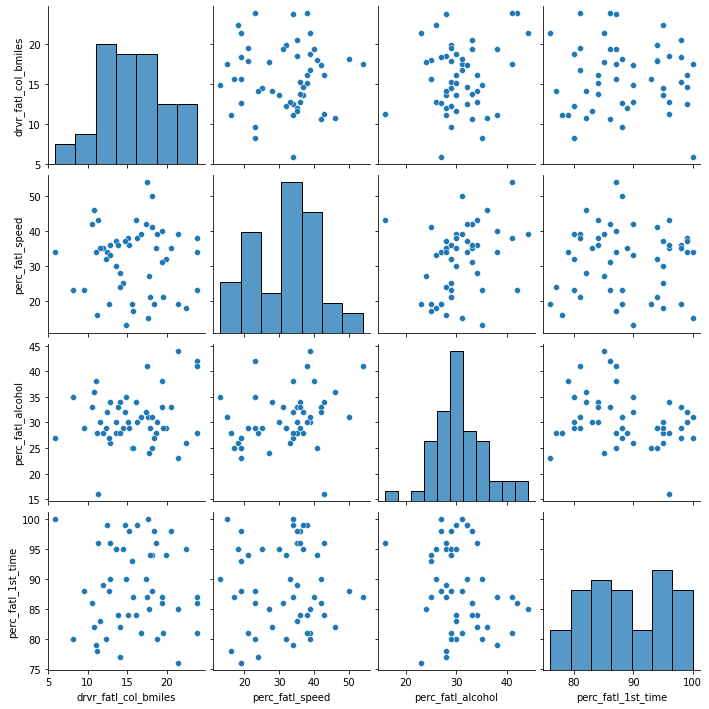

In [95]:
sns.pairplot(accidents)

**PEARSON CORRELATION COEFFICIENT**

In [96]:
pearsoncorr_road = accidents.corr(method = 'pearson')
pearsoncorr_road

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


**MULTIPLE LINEAR REGRESSION**

In [97]:
x=accidents[['perc_fatl_1st_time','perc_fatl_alcohol','perc_fatl_speed']]
y=accidents[['drvr_fatl_col_bmiles']]


In [98]:
print(x)

    perc_fatl_1st_time  perc_fatl_alcohol  perc_fatl_speed
0                   80                 30               39
1                   94                 25               41
2                   96                 28               35
3                   95                 26               18
4                   89                 28               35
5                   95                 28               37
6                   82                 36               46
7                   99                 30               38
8                  100                 27               34
9                   94                 29               21
10                  93                 25               19
11                  87                 41               54
12                  98                 29               36
13                  96                 34               36
14                  95                 29               25
15                  87                 25               

In [99]:
print(y)

    drvr_fatl_col_bmiles
0                   18.8
1                   18.1
2                   18.6
3                   22.4
4                   12.0
5                   13.6
6                   10.8
7                   16.2
8                    5.9
9                   17.9
10                  15.6
11                  17.5
12                  15.3
13                  12.8
14                  14.5
15                  15.7
16                  17.8
17                  21.4
18                  20.5
19                  15.1
20                  12.5
21                   8.2
22                  14.1
23                   9.6
24                  17.6
25                  16.1
26                  21.4
27                  14.9
28                  14.7
29                  11.6
30                  11.2
31                  18.4
32                  12.3
33                  16.8
34                  23.9
35                  14.1
36                  19.9
37                  12.8
38                  18.2


In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [102]:
LR = LinearRegression()

In [103]:
LR.fit(x_train,y_train)

LinearRegression()

In [104]:
y_prediction =  LR.predict(x_test)
y_prediction

array([[16.50749146],
       [14.864296  ],
       [16.14174517],
       [17.39340849],
       [15.87918824],
       [12.83162505],
       [16.88286131],
       [15.35333654],
       [16.04435668],
       [17.31506876],
       [15.56782166]])

In [105]:
rmse = mean_squared_error(y_test,y_prediction, squared=False)

In [106]:
print('The rmse is: ', rmse)

The rmse is:  3.6618051174889708


In [107]:
from sklearn import preprocessing

**STANDARDIZED THE DATA**

In [108]:
scaler = preprocessing.StandardScaler()
standardized_x = scaler.fit_transform(x)

In [109]:
print(standardized_x)

[[-1.26611685 -0.1350496   0.76264511]
 [ 0.76536053 -1.1189824   0.97232113]
 [ 1.05557158 -0.52862272  0.34329308]
 [ 0.91046605 -0.92219584 -1.43895304]
 [ 0.03983289 -0.52862272  0.34329308]
 [ 0.91046605 -0.52862272  0.5529691 ]
 [-0.9759058   1.04566976  1.49651116]
 [ 1.49088816 -0.1350496   0.6578071 ]
 [ 1.63599369 -0.72540928  0.23845508]
 [ 0.76536053 -0.33183616 -1.12443902]
 [ 0.620255   -1.1189824  -1.33411503]
 [-0.25037816  2.02960256  2.33521522]
 [ 1.34578263 -0.33183616  0.44813109]
 [ 1.05557158  0.65209664  0.44813109]
 [ 0.91046605 -0.33183616 -0.70508699]
 [-0.25037816 -1.1189824  -1.54379105]
 [-0.54058922 -1.31576896 -0.49541097]
 [-1.84653896 -1.51255552 -1.33411503]
 [ 1.34578263  0.45531008  0.34329308]
 [-0.68569475 -0.1350496   0.6578071 ]
 [ 1.49088816  0.25852352  0.23845508]
 [-1.26611685  0.8488832  -0.914763  ]
 [-1.70143344 -0.52862272 -0.809925  ]
 [-0.10527264 -0.33183616 -0.914763  ]
 [ 1.63599369  0.06173696 -1.75346706]
 [-0.68569475  0.65209664

**PERFORMING PCA**

In [110]:
from sklearn.decomposition import PCA


In [111]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(standardized_x)
principalComponents

array([[ 0.88463912,  0.46421102],
       [-0.62529903, -1.22024698],
       [-0.67169596, -1.02786253],
       [-1.83954608,  0.23991011],
       [-0.21174283, -0.25666671],
       [-0.49390467, -1.05414432],
       [ 1.98805561, -0.22697834],
       [-0.41984695, -1.56080846],
       [-1.13099129, -1.40144229],
       [-1.18444358,  0.14877025],
       [-1.79251216,  0.39090271],
       [ 2.80996806, -1.31802924],
       [-0.60664618, -1.31530775],
       [ 0.2268846 , -1.08935235],
       [-1.02598376, -0.23430583],
       [-1.51035032,  1.18838032],
       [-0.95893975,  0.72533611],
       [-0.95632936,  2.26156134],
       [-0.10099555, -1.24259045],
       [ 0.56576691,  0.091754  ],
       [-0.36316811, -1.28565771],
       [ 0.6900851 ,  1.56144575],
       [-0.03971211,  1.81587269],
       [-0.67811433,  0.67334261],
       [-1.63409399, -0.10065137],
       [ 1.40766864, -0.24488656],
       [ 2.52202483, -0.07092466],
       [-0.52740931,  1.14200056],
       [-0.19504256,

In [112]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal_component_1', 'principal_component_2'])
principalDf

,principal_component_1,principal_component_2
0,0.884639,0.464211
1,-0.625299,-1.220247
2,-0.671696,-1.027863
3,-1.839546,0.239910
4,-0.211743,-0.256667
5,-0.493905,-1.054144
6,1.988056,-0.226978
7,-0.419847,-1.560808
8,-1.130991,-1.401442
9,-1.184444,0.148770


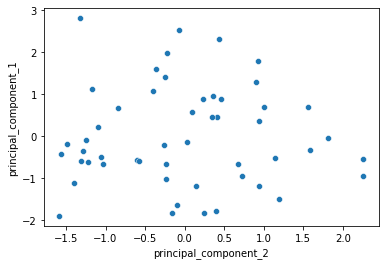

In [113]:
sns.scatterplot(data=principalDf ,x="principal_component_2",y="principal_component_1")

In [114]:
from sklearn.preprocessing import MinMaxScaler

In [115]:
scaler=MinMaxScaler()
scaler.fit(principalDf[['principal_component_1']])
principalDf['principal_component_1'] = scaler.transform(principalDf[['principal_component_1']])

scaler.fit(principalDf[['principal_component_2']])
principalDf['principal_component_2'] = scaler.transform(principalDf[['principal_component_2']])



In [116]:
from sklearn.cluster import KMeans

In [117]:
kmeans = KMeans(3)
y_predicted=kmeans.fit_predict(principalDf[['principal_component_1','principal_component_2']])

In [118]:
principalDf['clusters']=y_predicted
principalDf

,principal_component_1,principal_component_2,clusters
0,0.591954,0.532999,0
1,0.271943,0.095330,1
2,0.262110,0.145317,1
3,0.014601,0.474719,1
4,0.359591,0.345695,1
5,0.299791,0.138488,1
6,0.825807,0.353409,0
7,0.315486,0.006843,1
8,0.164769,0.048251,1
9,0.153441,0.451039,1


Text(0, 0.5, 'principal_component_2')

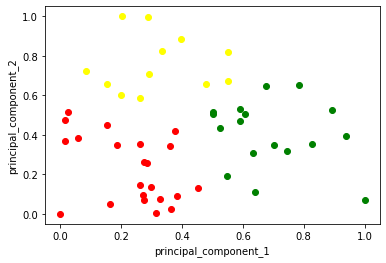

In [119]:
df1=principalDf[principalDf.clusters==0]
df2=principalDf[principalDf.clusters==1]
df3=principalDf[principalDf.clusters==2]
plt.scatter(df1.principal_component_1,df1['principal_component_2'],color='green')
plt.scatter(df2.principal_component_1,df2['principal_component_2'],color='red')
plt.scatter(df3.principal_component_1,df3['principal_component_2'],color='yellow')
plt.xlabel('principal_component_1')
plt.ylabel('principal_component_2')


In [120]:
accidents['clusters']=y_predicted

,count,mean,sum
clusters,,,
0,17,872.132759,14826.2569
1,22,898.378595,19764.3291
2,12,920.385367,11044.6244


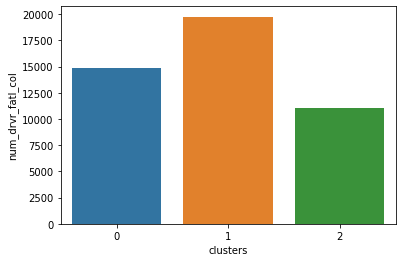

In [121]:
t=accidents.merge(miles,on='state')
t['num_drvr_fatl_col']=(t['million_miles_annually']*t['drvr_fatl_col_bmiles'])/1000
sns.barplot(x='clusters', y='num_drvr_fatl_col', data=t, estimator=sum, ci=None)
count_mean_sum = t.groupby('clusters')['num_drvr_fatl_col'].agg(['count', 'mean', 'sum'])
count_mean_sum 

In [ ]:
# Which cluster do you think should be a focus for policy intervention and further investigation?
# cluster_num = 1
# I'd choose cluster# 1 to further investigate since it has the largest number of fatalities.